In [1]:
!pip install scikit-fuzzy --upgrade
#!pip install scikit-fuzzy==0.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=657e1884cbca79b4a1c6e1ec1c8af4b1fe4427317e77b8f203a6c5a578d70f37
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
import skfuzzy

Saving UCI_Credit_Card.csv to UCI_Credit_Card (1).csv


In [6]:
base = pd.read_csv('UCI_Credit_Card.csv', header = 0)
base.shape

(30000, 25)

In [7]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [8]:
base['BILL_TOTAL'] = base['BILL_AMT1'] +base['BILL_AMT2'] +base['BILL_AMT3'] +base['BILL_AMT4'] +base['BILL_AMT5'] +base['BILL_AMT6']

In [9]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [10]:
X = base.iloc[:,[1,25]].values

In [11]:
X.shape

(30000, 2)

In [12]:
r = skfuzzy.cmeans(data = X.T, c = 3, m=2, error=0.005, maxiter=1000, init=None)

In [13]:
r

(array([[ 308713.71685673, 1332262.96153026],
        [ 175794.9811051 ,  491921.8392506 ],
        [ 140102.40781079,   80564.85724681]]),
 array([[0.00987796, 0.00245831, 0.00185368, ..., 0.00684966, 0.01926976,
         0.01726473],
        [0.0701627 , 0.01898467, 0.01813666, ..., 0.05751469, 0.38188827,
         0.26317257],
        [0.91995934, 0.97855702, 0.98000966, ..., 0.93563564, 0.59884197,
         0.7195627 ]]),
 array([[0.15472673, 0.34977266, 0.82299097, ..., 0.92687248, 0.44232073,
         0.58894969],
        [0.50586362, 0.18270175, 0.02745452, ..., 0.00588761, 0.5327441 ,
         0.30455065],
        [0.33940965, 0.46752559, 0.14955451, ..., 0.06723992, 0.02493517,
         0.10649965]]),
 array([[1355659.2687218 , 1328656.08053256, 1249894.62250175, ...,
         1292183.11441273, 1089919.29398084, 1131366.6213348 ],
        [ 508663.92833192,  478111.59918941,  399587.96988002, ...,
          445932.63449036,  244829.84435877,  289776.3821443 ],
        [ 140475

In [14]:
previsoes_porcentagem = r[1]

In [15]:
previsoes_porcentagem.shape

(3, 30000)

In [16]:
previsoes_porcentagem

array([[0.00987796, 0.00245831, 0.00185368, ..., 0.00684966, 0.01926976,
        0.01726473],
       [0.0701627 , 0.01898467, 0.01813666, ..., 0.05751469, 0.38188827,
        0.26317257],
       [0.91995934, 0.97855702, 0.98000966, ..., 0.93563564, 0.59884197,
        0.7195627 ]])

In [17]:
previsoes_porcentagem[0][0]

0.009877956277530076

In [18]:
previsoes_porcentagem[1][0]

0.07016270321389666

In [19]:
previsoes_porcentagem[2][0]

0.9199593405085732

In [20]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

0.9999999999999999

In [21]:
previsoes = previsoes_porcentagem.argmax(axis=0)

In [22]:
previsoes

array([2, 2, 2, ..., 2, 2, 2])

In [23]:
previsoes[5000]

2

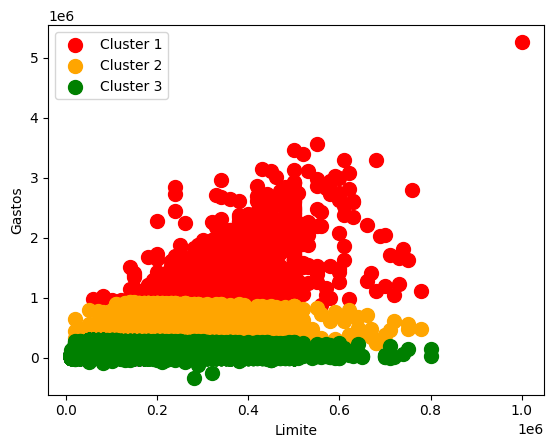

In [24]:
plt.scatter(X[previsoes ==0, 0], X[previsoes ==0, 1], s = 100, c= 'red', label = 'Cluster 1')
plt.scatter(X[previsoes ==1, 0], X[previsoes ==1, 1], s = 100, c= 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes ==2, 0], X[previsoes ==2, 1], s = 100, c= 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();